# NLP Software Check

This Jupyter Notebook checks that you're ready to use all of the necessary software for this course.

The first check is that you can open this notebook and run each cell. If so, Jupyter notebooks work on your computer! 

Notebooks essentially let you mix code and markdown (a type of formatted text). We'll be using these for a number of in-class activities. 

This next chunks will verify that you can import and use numpy, a library that gives us a bunch of tools for efficient numerical computation, as well as real arrays (As opposed to lists) in Python!

This chunk prints the version number

In [3]:
import numpy as np

print(np.__version__)

1.26.2


This one introduces some numpy tools that will become useful to us --- a function to get the base-2 logarithm of a number (np.log2) and another to do addition on two numbers in logspace (np.logaddexp). Note that this is a little imprecise!

In [10]:
# Moving between logspace and regular numbers!
np.exp2(np.logaddexp2(np.log2(3.0), np.log2(7.0)))

9.999999999999998

Despite that, this is useful to us because we'll be working with numbers *very* close to 0, and storing them in logspace so they don't get lost to imprecision in floating point representations (think COMP240!). Sometimes we want to add them together. Here's an example!

In [38]:
a = -1075
b = -1075

print("a = {}, exp2(a) = {}".format(a, np.exp2(a)))
print("b = {}, exp2(b) = {}".format(b, np.exp2(b)))
print("np.log2(np.exp2(a) + np.exp2(b)) = {}".format(np.log2(np.exp2(a) + np.exp2(b)))) # A problem!
print("np.logaddexp2(a, b) = {}".format(np.logaddexp2(a, b))) #As expected!

a = -1075, exp2(a) = 0.0
b = -1075, exp2(b) = 0.0
np.log2(np.exp2(a) + np.exp2(b)) = -inf
np.logaddexp2(a, b) = -1074.0


/var/folders/18/lflm4x2d4jz9_pptv0gy8w840000gq/T/ipykernel_41954/735804027.py:6: RuntimeWarning: divide by zero encountered in log2
  print("np.log2(np.exp2(a) + np.exp2(b)) = {}".format(np.log2(np.exp2(a) + np.exp2(b)))) # A problem!


The next chunk tests to see whether pytorch is installed. This is the industry and research standard machine learning library.

This sample code constructs a 2D *tensor* (i.e., a 3x3 matrix) and then transposes it along dimensions 0 and 1 (i.e., the only two dimensions in a matrix). 

In [9]:
import torch

torch.tensor([[1,2,3],[4,5,6], [7,8,9]]).transpose(0,1)

tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

The next chunk tests if scipy & matplotlib are installed, which will give us some assorted tools, including probability and stats resources from scipy and plotting functionality from matplotlib.

This snippet will generate 1000 random samples from a normal distribution and plot them.

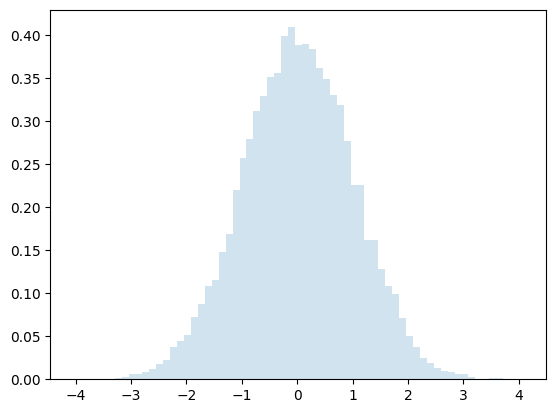

In [46]:
from scipy import stats
import matplotlib.pyplot as plt

samples = stats.norm.rvs(size=10000) #sample from a norm(0,1) random variable 10000 times

fig, ax = plt.subplots(1, 1)
ax.hist(samples, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show()

These chunks test for nltk, the Natural Language ToolKit. Amongst the many resources it has are samples of a number of corpora (here, the Penn Treebank) and tools for representing annotated (here, parsed) text!

Because there are so many resources in NLTK (that are sometimes large!), occasionally something will require that you download the resource separately using the nltk downloader. The first chunk downloads a sample of the Penn Treebank, and the second prints a single parse tree.

In [55]:
import nltk
nltk.download("treebank")

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/sarehall/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [58]:
from nltk.corpus import treebank

print(treebank.parsed_sents('wsj_0003.mrg')[0])

(S
  (S-TPC-1
    (NP-SBJ
      (NP (NP (DT A) (NN form)) (PP (IN of) (NP (NN asbestos))))
      (RRC
        (ADVP-TMP (RB once))
        (VP
          (VBN used)
          (NP (-NONE- *))
          (S-CLR
            (NP-SBJ (-NONE- *))
            (VP
              (TO to)
              (VP
                (VB make)
                (NP (NNP Kent) (NN cigarette) (NNS filters))))))))
    (VP
      (VBZ has)
      (VP
        (VBN caused)
        (NP
          (NP (DT a) (JJ high) (NN percentage))
          (PP (IN of) (NP (NN cancer) (NNS deaths)))
          (PP-LOC
            (IN among)
            (NP
              (NP (DT a) (NN group))
              (PP
                (IN of)
                (NP
                  (NP (NNS workers))
                  (RRC
                    (VP
                      (VBN exposed)
                      (NP (-NONE- *))
                      (PP-CLR (TO to) (NP (PRP it)))
                      (ADVP-TMP
                        (NP
                 

if you have svgling installed (`pip3 install svgling`), the following chunk should print out a render of the syntax tree!

And finally this chunk will demonstrate using type annotations in Python, which are entirely optional, but will show up in starter code and may be useful to be aware of!

You are also within your rights to ignore static type checking in Python --- just another tool to see and consider! At the very least, **this code should run!**

In [53]:
from typing import Sequence, Protocol

# A function from Sequence (anything index-able) to another Sequence
def reverse(l : Sequence) -> Sequence:
    if len(l) == 0:
        return []
    return [l[-1]] + reverse(l[:-1])

# Annotate the variable x as a list of integers
x : list[int] = [1, 2, 3]
print(reverse(x))

# Define a Protocol, which essentially functions like an interface
class IsThisAnInterface(Protocol):
    requiredInstanceVar : int
    def requiredMethod(self) -> None: ...

# Implementing that protocol/interface
class Implementer:
    requiredInstanceVar : int = 3
    def __init__(self):
        pass
    def requiredMethod(self):
        return None

# This should typecheck!
y : IsThisAnInterface = Implementer()

[3, 2, 1]
